# INMERSIÓN DE DATOS CON PYTHON

#**PROBLEMA DE NEGOCIO**


---




La importancia de reducir el riesgo crediticio ha llevado a una institución financiera alemana a buscar soluciones innovadoras. Como científicos de datos, hemos sido convocados para construir un modelo de machine learning preciso y confiable que sea capaz de evaluar con mayor precisión la probabilidad de incumplimiento crediticio de sus clientes.

In [1]:
# prompt: importa los siguientes módulos con sus respectivos alias: pandas, matplotlib, seaborn, drive de google colab, warnings

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import warnings

drive.mount("/content/Drive")
warnings.filterwarnings("ignore")

ModuleNotFoundError: No module named 'pandas'

In [59]:
pd.set_option('display.max_columns',None)
global df_banco, resultados

In [77]:
df_banco = pd.read_csv('/content/Drive/MyDrive/Colab Notebooks/Inmersion/german_credit.csv')
df_banco.head()

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,other_debtors,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,none,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,none,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,none,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,guarantor,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,none,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [78]:
df_banco.shape

(1000, 21)

In [79]:
df_banco.columns

Index(['default', 'account_check_status', 'duration_in_month',
       'credit_history', 'purpose', 'credit_amount', 'savings',
       'present_emp_since', 'installment_as_income_perc',
       'personal_status_sex', 'other_debtors', 'present_res_since', 'property',
       'age', 'other_installment_plans', 'housing', 'credits_this_bank', 'job',
       'people_under_maintenance', 'telephone', 'foreign_worker'],
      dtype='object')

In [80]:
df_banco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   default                     1000 non-null   int64 
 1   account_check_status        1000 non-null   object
 2   duration_in_month           1000 non-null   int64 
 3   credit_history              1000 non-null   object
 4   purpose                     1000 non-null   object
 5   credit_amount               1000 non-null   int64 
 6   savings                     1000 non-null   object
 7   present_emp_since           1000 non-null   object
 8   installment_as_income_perc  1000 non-null   int64 
 9   personal_status_sex         1000 non-null   object
 10  other_debtors               1000 non-null   object
 11  present_res_since           1000 non-null   int64 
 12  property                    1000 non-null   object
 13  age                         1000 non-null   int64

In [81]:
df_banco.account_check_status.value_counts().index

Index(['no checking account', '< 0 DM', '0 <= ... < 200 DM',
       '>= 200 DM / salary assignments for at least 1 year'],
      dtype='object', name='account_check_status')

In [82]:
columnas = list(df_banco.select_dtypes(include=['object']).columns)
for columna in columnas:
  print(f'El nombre de la columna: {columna}')
  print(list(df_banco[f'{columna}'].value_counts().index))
  print('\n')

El nombre de la columna: account_check_status
['no checking account', '< 0 DM', '0 <= ... < 200 DM', '>= 200 DM / salary assignments for at least 1 year']


El nombre de la columna: credit_history
['existing credits paid back duly till now', 'critical account/ other credits existing (not at this bank)', 'delay in paying off in the past', 'all credits at this bank paid back duly', 'no credits taken/ all credits paid back duly']


El nombre de la columna: purpose
['domestic appliances', 'car (new)', 'radio/television', 'car (used)', 'business', '(vacation - does not exist?)', 'education', 'repairs', 'furniture/equipment', 'retraining']


El nombre de la columna: savings
['... < 100 DM', 'unknown/ no savings account', '100 <= ... < 500 DM', '500 <= ... < 1000 DM ', '.. >= 1000 DM ']


El nombre de la columna: present_emp_since
['1 <= ... < 4 years', '.. >= 7 years', '4 <= ... < 7 years', '... < 1 year ', 'unemployed']


El nombre de la columna: personal_status_sex
['male : single', 'femal

In [76]:
#dic = {'yes':1,'no':0}
#df_banco['foreign_worker'] = df_banco['foreign_worker'].map(dic)
#df_banco['foreign_worker']

In [83]:
def procesar_datos():
  global df_banco
  df_banco = df_banco.drop_duplicates() if df_banco.duplicated().any() else df_banco
  df_banco = df_banco.dropna() if df_banco.isnull().values.any() else df_banco

  a = {'no checking account': 4,
      '>= 200 DM / salary assignments for at least 1 year': 3,
      '0 <= ... < 200 DM': 2,
      '< 0 DM': 1
  }
  df_banco['account_check_status'] = df_banco['account_check_status'].map(a)

  a = { 'no credits taken/ all credits paid back duly' : 1,
      'all credits at this bank paid back duly' : 2,
      'existing credits paid back duly till now' : 3,
      'delay in paying off in the past' : 4,
      'critical account/ other credits existing (not at this bank)' : 5
  }
  df_banco['credit_history'] = df_banco['credit_history'].map(a)

  a = {'car (new)' : 1,
      'car (used)' : 2,
      'furniture/equipment' : 3,
      'radio/television' : 4,
      'domestic appliances' : 5,
      'repairs' : 6,
      'education' : 7,
      '(vacation - does not exist?)' : 8,
      'retraining' : 9,
      'business' : 10,
      'others' : 11
  }
  df_banco['purpose'] = df_banco['purpose'].map(a)

  a = {'unknown/ no savings account' : 1,
      '.. >= 1000 DM ' : 2,
      '500 <= ... < 1000 DM ' : 3,
      '100 <= ... < 500 DM' : 4,
      '... < 100 DM' : 5
  }
  df_banco['savings'] = df_banco['savings'].map(a)

  a = {'.. >= 7 years' : 1,
      '4 <= ... < 7 years' : 2,
      '1 <= ... < 4 years' : 3,
      '... < 1 year ' : 4,
      'unemployed' : 5
  }
  df_banco['present_emp_since'] = df_banco['present_emp_since'].map(a)

  a = {'male : divorced/separated' : 1,
      'female : divorced/separated/married' : 2,
      'male : single' : 3,
      'male : married/widowed' : 4,
      'female : single' : 5
  }
  df_banco['personal_status_sex'] = df_banco['personal_status_sex'].map(a)

  a = {'none' : 1,
      'co-applicant' : 2,
      'guarantor' : 3
  }
  df_banco['other_debtors'] = df_banco['other_debtors'].map(a)

  a = {'real estate' : 1,
      'if not A121 : building society savings agreement/ life insurance' : 2,
      'if not A121/A122 : car or other, not in attribute 6' : 3,
      'unknown / no property' : 4
  }
  df_banco['property'] = df_banco['property'].map(a)

  a = {'bank' : 1,
      'stores' : 2,
      'none' : 3
  }
  df_banco['other_installment_plans'] = df_banco['other_installment_plans'].map(a)

  a = {'rent' : 1,
      'own' : 2,
      'for free' : 3
  }
  df_banco['housing'] = df_banco['housing'].map(a)

  a = {'unemployed/ unskilled - non-resident' : 1,
      'unskilled - resident' : 2,
      'skilled employee / official' : 3,
      'management/ self-employed/ highly qualified employee/ officer' : 4
  }
  df_banco['job'] = df_banco['job'].map(a)

  a = {'yes, registered under the customers name ' : 1,
      'none' : 0
  }
  df_banco['telephone'] = df_banco['telephone'].map(a)

  a = {'yes' : 1,
      'no' : 0
  }
  df_banco['foreign_worker'] = df_banco['foreign_worker'].map(a)

In [84]:
procesar_datos()
df_banco.sample(3)

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,other_debtors,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
153,0,2,24,5,2,7758,2,1,2,2,1,4,4,29,3,1,1,3,1,0,1
88,0,1,18,3,1,2249,4,2,4,3,1,3,3,30,3,2,1,4,2,1,1
18,1,2,24,3,2,12579,5,1,4,2,1,2,4,44,3,3,1,4,1,1,1


In [85]:
variables_discretas = ['personal_status_sex','age',
                       'duration_in_month','credit_amount','default']
df_banco[variables_discretas].tail(3)

,personal_status_sex,age,duration_in_month,credit_amount,default
997,3,38,12,804,0
998,3,23,45,1845,1
999,3,27,45,4576,0


In [86]:
dic_sexo = {2:1,5:1,1:0,3:0,4:0}
df_banco['sexo'] = df_banco['personal_status_sex'].map(dic_sexo)

In [87]:
def feature_engineering():
  global df_banco
  dic_sexo = {2:1, 5:1, 1:0, 3:0, 4:0}
  dic_est_civil = {3:1, 5:1, 1:0, 2:0, 4:0}
  df_banco['sexo'] = df_banco['personal_status_sex'].map(dic_sexo)
  df_banco['estado_civil'] = df_banco['personal_status_sex'].map(dic_est_civil)
  df_banco['rango_edad'] = pd.cut(x = df_banco['age'],
                                  bins=[18, 30, 40, 50, 60, 70, 80],
                                  labels = [1, 2, 3, 4, 5, 6]).astype(int)
  df_banco['rango_plazos_credito']=pd.cut(x = df_banco['duration_in_month'],
                                            bins=[1, 12, 24, 36, 48, 60, 72],
                                            labels = [1, 2, 3, 4, 5, 6]).astype(int)
  df_banco['rango_valor_credito']=pd.cut(x = df_banco['credit_amount'],
                                           bins=[1, 1000, 2000, 3000, 4000,
                                                 5000, 6000, 7000, 8000, 9000,
                                                 10000, 11000, 12000, 13000,
                                                 14000, 15000, 16000, 17000,
                                                 18000, 19000, 20000],
                                           labels = [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                     10, 11, 12, 13, 14, 15, 16,
                                                     17, 18, 19, 20]).astype(int)
  df_banco = df_banco.drop(columns=['personal_status_sex','age',
                                    'duration_in_month','credit_amount'])

In [88]:
feature_engineering()
df_banco.head(2)

,default,account_check_status,credit_history,purpose,savings,present_emp_since,installment_as_income_perc,other_debtors,present_res_since,property,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker,sexo,estado_civil,rango_edad,rango_plazos_credito,rango_valor_credito
0,0,1,5,5,1,1,4,1,4,1,3,2,2,3,1,1,1,0,1,5,1,2
1,1,2,3,5,5,3,2,1,2,1,3,2,1,3,1,0,1,1,0,1,4,6


In [89]:
df_banco.describe()

,default,account_check_status,credit_history,purpose,savings,present_emp_since,installment_as_income_perc,other_debtors,present_res_since,property,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker,sexo,estado_civil,rango_edad,rango_plazos_credito,rango_valor_credito
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,0.300000,2.577000,3.54500,4.277000,3.895000,2.616000,2.973000,1.145000,2.845000,2.358000,2.675000,1.929000,1.407000,2.904000,1.155000,0.404000,0.963000,0.310000,0.54800,2.027000,1.975000,3.766000
std,0.458487,1.257638,1.08312,2.739302,1.580023,1.208306,1.118715,0.477706,1.103718,1.050209,0.705601,0.531264,0.577654,0.653614,0.362086,0.490943,0.188856,0.462725,0.49794,1.136469,0.968149,2.821206
min,0.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000,1.000000
25%,0.000000,1.000000,3.00000,2.000000,3.000000,1.000000,2.000000,1.000000,2.000000,1.000000,3.000000,2.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.00000,1.000000,1.000000,2.000000
50%,0.000000,2.000000,3.00000,4.000000,5.000000,3.000000,3.000000,1.000000,3.000000,2.000000,3.000000,2.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,1.00000,2.000000,2.000000,3.000000
75%,1.000000,4.000000,5.00000,5.000000,5.000000,3.000000,4.000000,1.000000,4.000000,3.000000,3.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.00000,3.000000,2.000000,4.000000
max,1.000000,4.000000,5.00000,10.000000,5.000000,5.000000,4.000000,3.000000,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,2.000000,1.000000,1.000000,1.000000,1.00000,6.000000,6.000000,19.000000


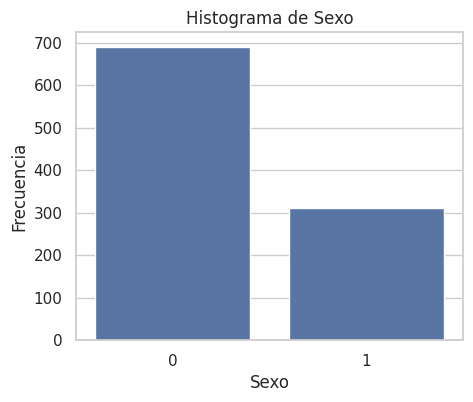

In [90]:
# Configurar el estilo de Seaborn (opcional)
sns.set(style="whitegrid")

# Crear el histograma utilizando Seaborn
plt.figure(figsize=(5, 4))
sns.countplot(data=df_banco, x='sexo')
plt.title('Histograma de Sexo')
plt.xlabel('Sexo')
plt.ylabel('Frecuencia')

# Mostrar el histograma
plt.show()

In [91]:
def analisis_exploratorio():
  global df_banco
  histogramas = ['sexo','estado_civil','rango_plazos_credito','rango_edad','default']
  lista_histogramas = list(enumerate(histogramas))
  plt.figure(figsize = (30,20))
  plt.title('Histogramas')
  for i in lista_histogramas:
    plt.subplot(3, 2, i[0]+1)
    sns.countplot(x = i[1], data = df_banco)
    plt.xlabel(i[1], fontsize=20)
    plt.ylabel('Total', fontsize=20)

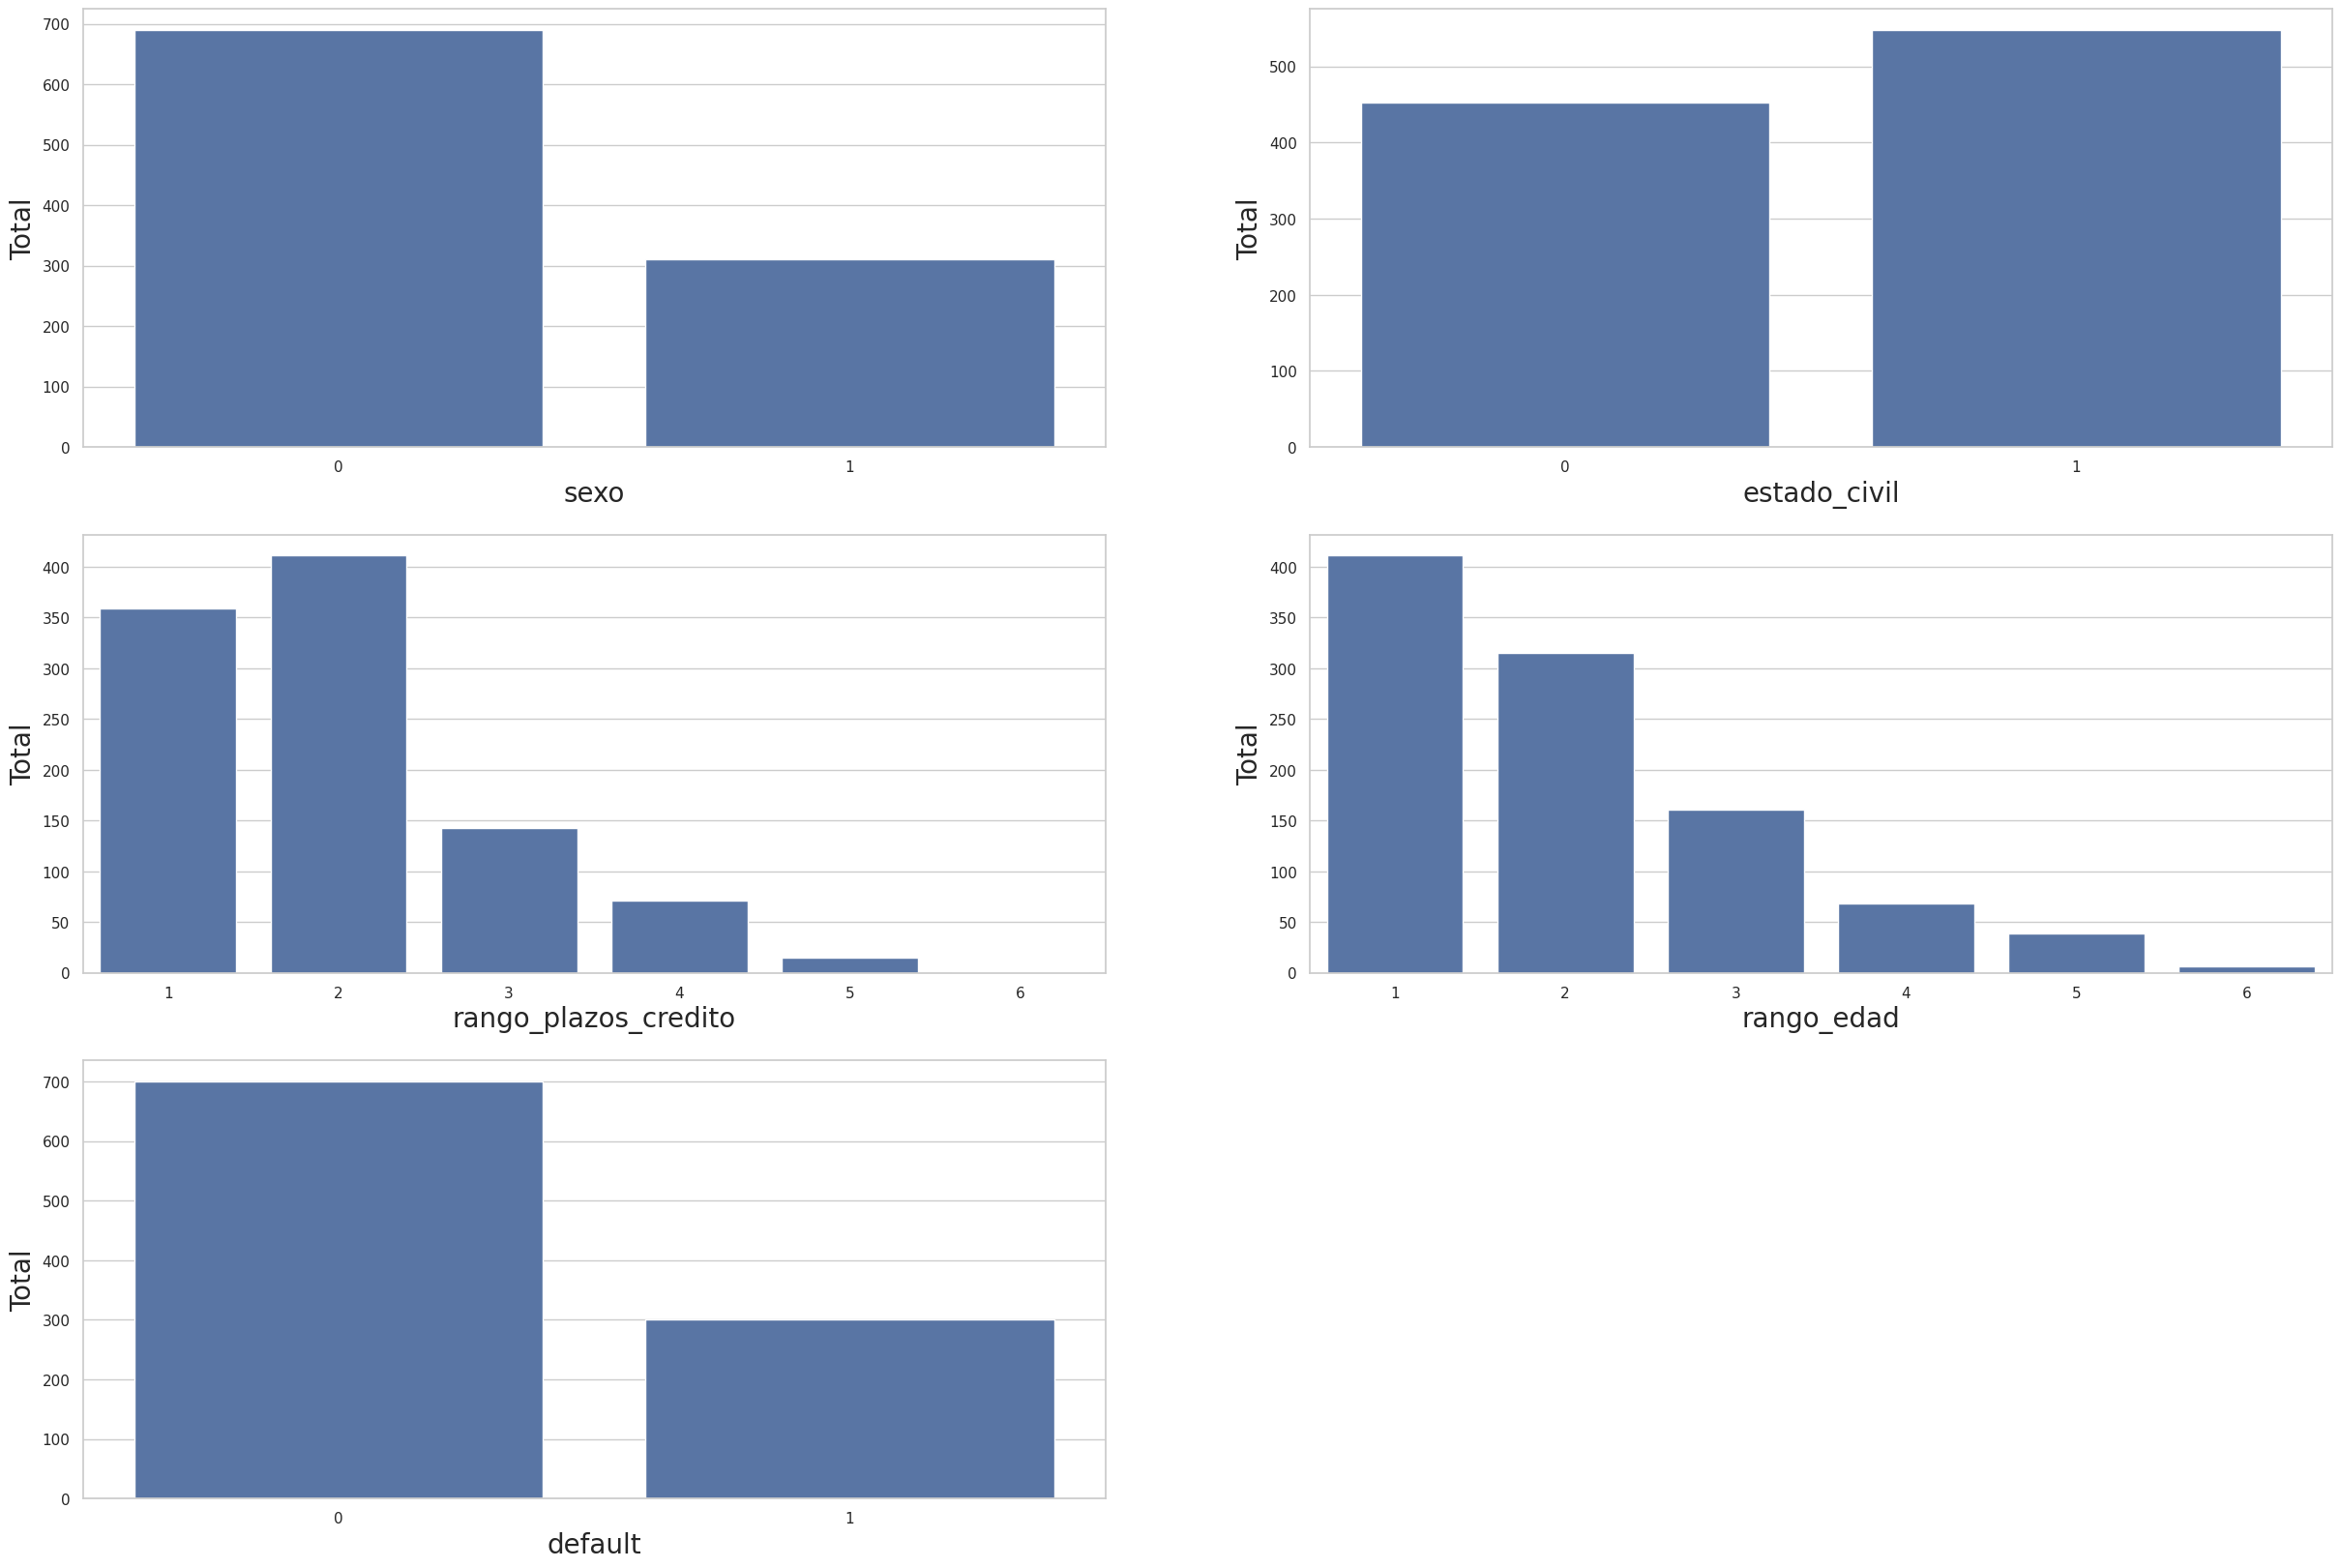

In [92]:
analisis_exploratorio()

## Desafíos

1. Analizar los datos de las distribuciones e identificar si hay algún valor o registros que no se deben considerar para el modelo.
2. Investigar qué es y como crear un mapa de calor para analizar la correlación de las variables.
3. Crear una conclusión para cada uno de los gráficos del histograma. Mirar los datos y extraer conclusiones, porque es una habilidad esencial.

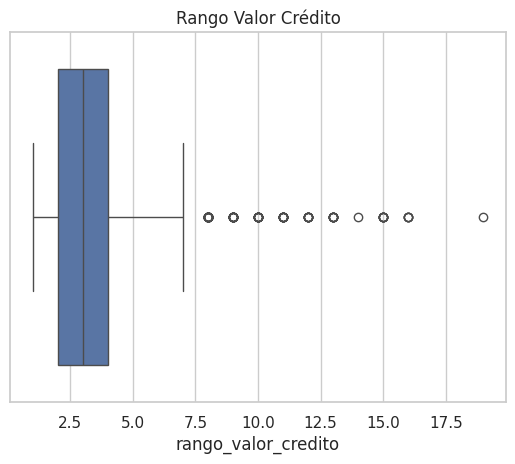

In [101]:
# Visualización de outliers para variables numéricas
sns.boxplot(x='rango_valor_credito', data=df_banco)
plt.title('Rango Valor Crédito')
plt.show()

# Verificar datos faltantes
missing_data = df_banco.isnull

In [100]:
# Calcular Q1, Q3 y IQR
Q1 = df_banco['rango_valor_credito'].quantile(0.25)
Q3 = df_banco['rango_valor_credito'].quantile(0.75)
IQR = Q3 - Q1

# Calcular límites para outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f'Lower Bound: {lower_bound}, Upper Bound: {upper_bound}')

# Filtrar registros dentro de los límites
filtered_data = df_banco[(df_banco['rango_valor_credito'] >= lower_bound) & (df_banco['rango_valor_credito'] <= upper_bound)]

# Verificar la cantidad de registros filtrados
print(f'Registros antes de filtrar: {len(df_banco)}, Registros después de filtrar: {len(filtered_data)}')

# Guardar el nuevo conjunto de datos sin outliers
filtered_data.to_csv('filtered_data.csv', index=False)

Lower Bound: -1.0, Upper Bound: 7.0
Registros antes de filtrar: 1000, Registros después de filtrar: 895


2. Investigar qué es y como crear un mapa de calor para analizar la correlación de las variables.

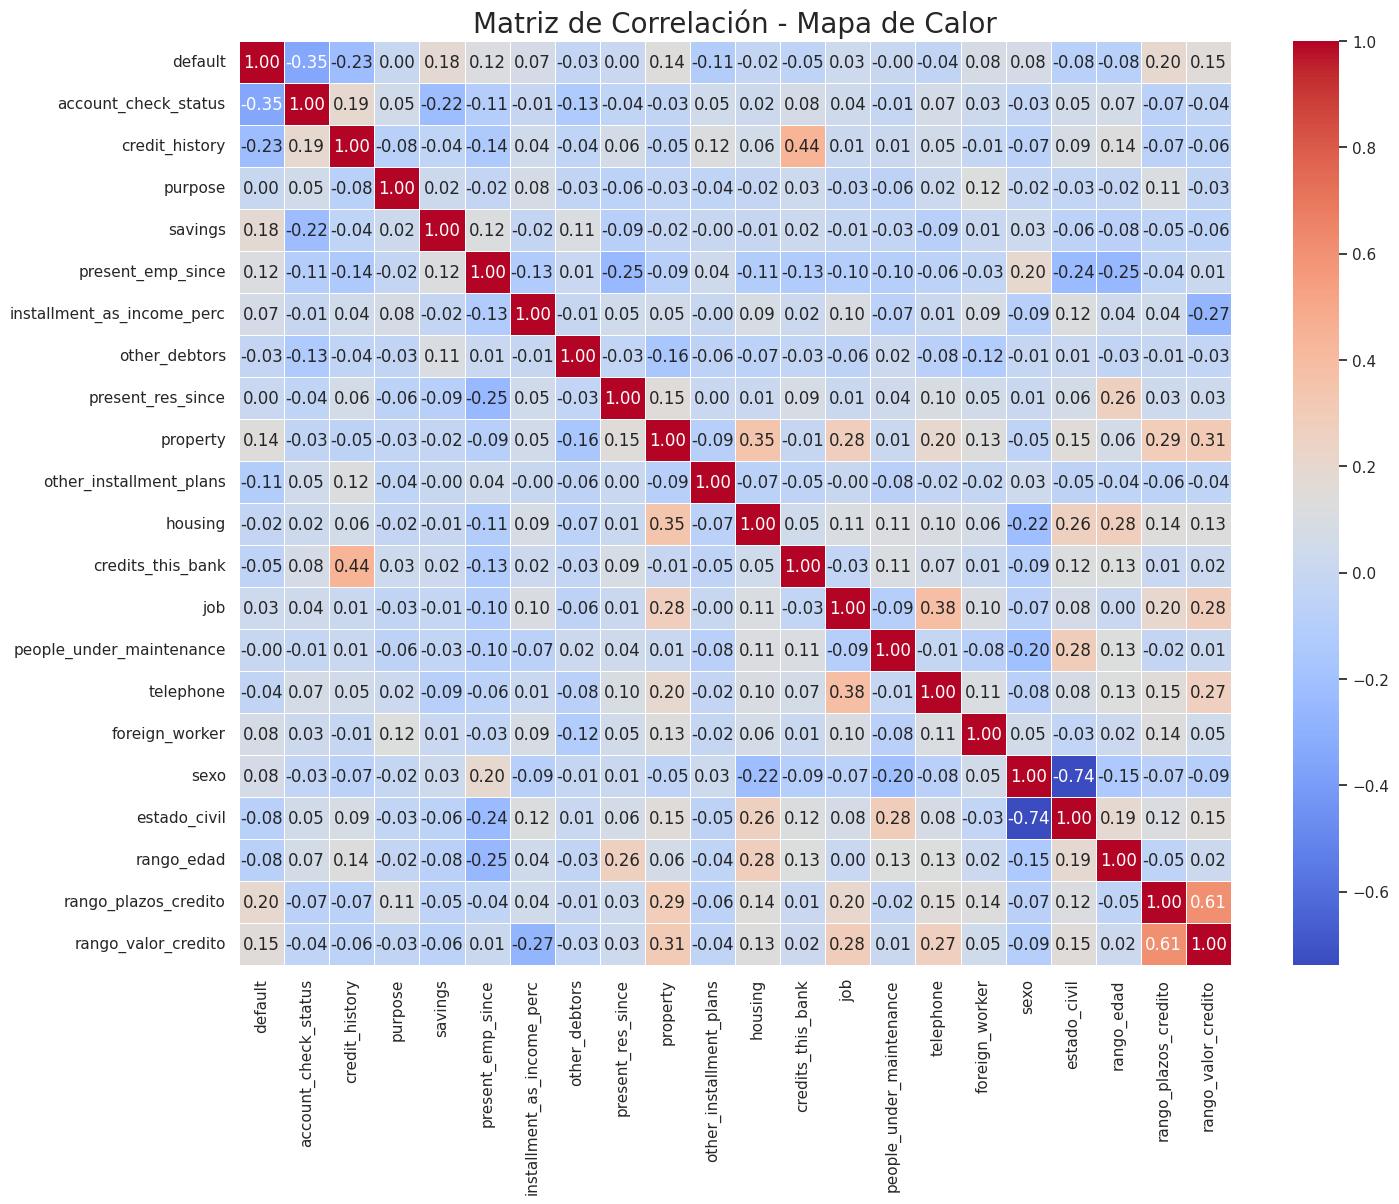

In [94]:
# Mapa de calor - Análisis de la correlación de las variables

sns.set(style="whitegrid")

# Heatmap de correlación
def plot_correlation_heatmap(df):
    plt.figure(figsize=(16, 12))
    correlation_matrix = df.corr()
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
    plt.title('Matriz de Correlación - Mapa de Calor', fontsize=20)
    plt.show()

# Ejecución de la función
plot_correlation_heatmap(df_banco)

**ANÁLISIS DE LA MATRIZ DE CORRELACIÓN**

1. **Relaciones más fuertes**:
    - `sexo` y `estado_civil` tienen una correlación negativa fuerte de -0.74, lo que sugiere que hay una fuerte relación inversa entre estas dos variables.
    - `rango_plazos_credito` y `rango_valor_credito` tienen una correlación positiva alta de 0.61, indicando que a medida que aumenta el rango de plazos de crédito, también aumenta el rango del valor del crédito.

2. **Relaciones moderadas**:
    - `credit_history` y `credits_this_bank` tienen una correlación positiva de 0.44. Esto indica que hay una relación moderada entre la historia crediticia y la cantidad de créditos con el banco.
    - `present_emp_since` y `rango_valor_credito` tienen una correlación positiva de 0.31, lo que sugiere que a mayor tiempo en el empleo actual, mayor es el rango del valor del crédito.

3. **Relaciones interesantes**:
    - `housing` y `property` tienen una correlación positiva de 0.35, lo cual es lógico ya que ambas variables están relacionadas con la posesión de propiedades.
    - `sexo` y `present_emp_since` tienen una correlación negativa de -0.25, lo que podría indicar diferencias en la estabilidad laboral según el género.

4. **Correlaciones bajas o sin relación significativa**:
    - Muchas variables tienen coeficientes de correlación cercanos a 0, como `purpose` y `telephone` (-0.06), lo que indica que no hay una relación lineal significativa entre estas variables.
    - `account_check_status` y `purpose` tienen una correlación baja de -0.05, lo que sugiere que el estado de la cuenta y el propósito del crédito no están fuertemente relacionados.

5. **Interpretaciones adicionales**:
    - Variables como `other_installment_plans` y `property` tienen una correlación negativa de -0.16, lo que puede indicar que las personas con otros planes de pago de cuotas son menos propensas a tener propiedades.
    - `default` tiene correlaciones bajas con la mayoría de las variables, excepto con `account_check_status` (-0.35), lo cual sugiere que el estado de la cuenta es un factor importante para predecir el default del crédito.

Conclusión detallada de cada gráfico del previo análisis exploratorio:

1. **Sexo**:
   - Hay dos categorías, 0 y 1.
   - La categoría 0 tiene un total mucho mayor (alrededor de 700) en comparación con la categoría 1 (alrededor de 300).
   - Esto sugiere una desigualdad en la distribución de género en los datos.

2. **Estado Civil**:
   - Similar al gráfico de sexo, hay dos categorías, 0 y 1.
   - La distribución entre estas dos categorías es bastante equilibrada, con una leve mayoría en la categoría 1 (alrededor de 500) comparada con la categoría 0 (alrededor de 400).

3. **Rango de Plazos de Crédito**:
   - Las categorías van de 1 a 6.
   - Las categorías 1 y 2 tienen los totales más altos, con alrededor de 350 y 400 respectivamente.
   - Las categorías 3 a 6 tienen significativamente menos observaciones, con la categoría 6 siendo la menor con muy pocas observaciones.

4. **Rango de Edad**:
   - Las categorías van de 1 a 6.
   - La categoría 1 tiene el total más alto, alrededor de 400.
   - La categoría 2 sigue con alrededor de 300.
   - Las categorías 3 a 6 tienen menos observaciones, con una disminución gradual en el total de observaciones a medida que aumenta la categoría.

5. **Default (Incumplimiento de Pago)**:
   - Hay dos categorías, 0 y 1.
   - La categoría 0 (sin incumplimiento) tiene un total mucho mayor (alrededor de 700) en comparación con la categoría 1 (con incumplimiento) que tiene alrededor de 300.
   - Esto indica que la mayoría de los individuos en el conjunto de datos no han incumplido sus pagos.

**Interpretaciones Generales**:
- **Desigualdades de Género**: La distribución de género está desequilibrada, con una mayoría significativa en una de las categorías.
- **Estado Civil**: Relativamente equilibrado, lo que sugiere que los datos no están sesgados en términos de estado civil.
- **Plazos de Crédito y Edad**: La mayoría de los datos se concentran en las categorías inferiores para ambos atributos, lo que podría indicar que la mayoría de los créditos se otorgan en plazos más cortos y a personas más jóvenes.
- **Default**: La baja incidencia de incumplimientos puede ser una señal positiva de la estabilidad financiera de los individuos en el conjunto de datos.

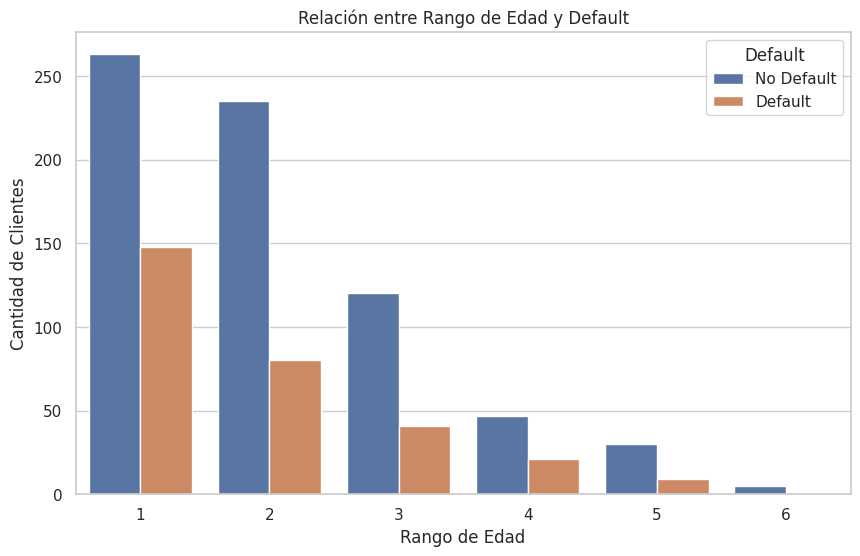

In [109]:
# Gráfico de barras para analizar la relación entre el rango de edad y el default
plt.figure(figsize=(10, 6))
sns.countplot(x='rango_edad', hue='default', data=df_banco)
plt.title('Relación entre Rango de Edad y Default')
plt.xlabel('Rango de Edad')
plt.ylabel('Cantidad de Clientes')
plt.legend(title='Default', labels=['No Default', 'Default'])

# Mostrar el gráfico
plt.show()

# Análisis del gráfico
# ----------------------
# El gráfico muestra que la mayoría de los clientes en el rango de edad 1 (18-30 años) no tienen incumplimientos de pago (default).
# Sin embargo, a medida que aumenta el rango de edad, se observa un ligero aumento en la cantidad de clientes con default.
# Esto podría indicar que los clientes mayores tienen una mayor probabilidad de incumplir con sus pagos.
# Es importante tener en cuenta que este es un análisis preliminar y se requiere una investigación más profunda para confirmar esta tendencia y determinar las posibles causas.
# Se recomienda realizar un análisis más detallado, incluyendo pruebas estadísticas, para confirmar la relación entre la edad y el default y comprender mejor los factores que influyen en el riesgo crediticio.
